# Data Wrangling

Data wrangling is the process of `cleaning`, `transforming`, and `organizing` data so that it can be used for `analysis` and `visualization`. It is an important step in the data analysis process because raw data is often `incomplete`, `inconsistent`, and in an `unstructured` format, which can make it difficult to work with.
- Data Wrangling helps to make the data more `consistent`, `accurate`, and `useful` for analysis and decision making.

In [51]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
df=sns.load_dataset('titanic')

In [53]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [54]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [56]:
df.isnull().sum() / len(df)* 100 #checking percentage of null values

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [57]:
# droping 'deck' column
df.drop(columns='deck', inplace=True)

In [58]:
# dealing with missing vaues
df['age']=df.age.fillna(value=df['age'].mean())

In [59]:
df['embarked']= df.embarked.fillna(value=df['embarked'].mode()[0])

In [60]:
df['embark_town']=df.embark_town.fillna(value=df['embark_town'].mode()[0])

In [61]:
df.isnull().sum() / len(df)*100

survived       0.0
pclass         0.0
sex            0.0
age            0.0
sibsp          0.0
parch          0.0
fare           0.0
embarked       0.0
class          0.0
who            0.0
adult_male     0.0
embark_town    0.0
alive          0.0
alone          0.0
dtype: float64

# Outliers Removal

## Visualization method:

<Axes: xlabel='sex', ylabel='age'>

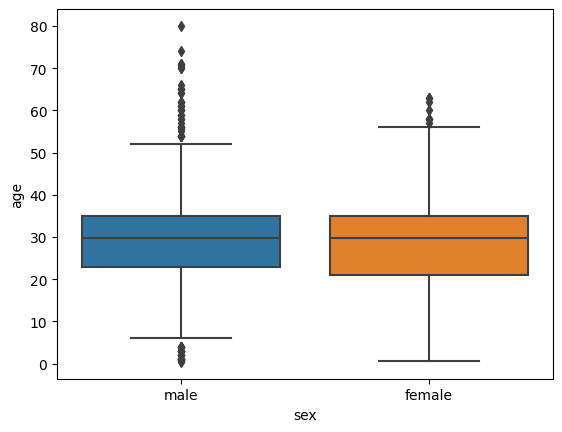

In [62]:
import seaborn as sns
# box plot for checking outliers
sns.boxplot(data=df, x='sex', y='age')

## IQR Method

In [63]:
Q1=df['age'].quantile(0.25)
Q3=df['age'].quantile(0.75)
IQR= Q3-Q1
IQR

lower_bound= Q1 - 1.5 * IQR
upper_bound= Q3 + 1.5 * IQR

df= df[(df['age'] > lower_bound) & (df['age'] < upper_bound)]

In [64]:
df.shape

(825, 14)

In [65]:
# 'fare' column
Q1=df['fare'].quantile(0.25)
Q3=df['fare'].quantile(0.75)
IQR= Q3-Q1
IQR

lower_bound= Q1 - 1.5 * IQR
upper_bound= Q3 + 1.5 * IQR

df= df[(df['fare'] > lower_bound) & (df['fare'] < upper_bound)]

In [19]:
df.shape

(657, 14)

<Axes: xlabel='age', ylabel='Count'>

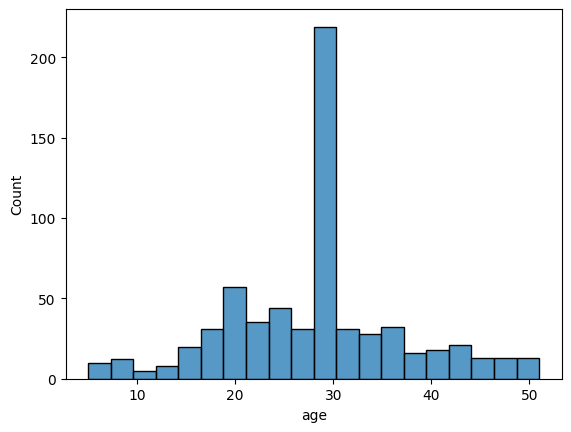

In [20]:
sns.histplot(df['age'])

<Axes: xlabel='fare', ylabel='Count'>

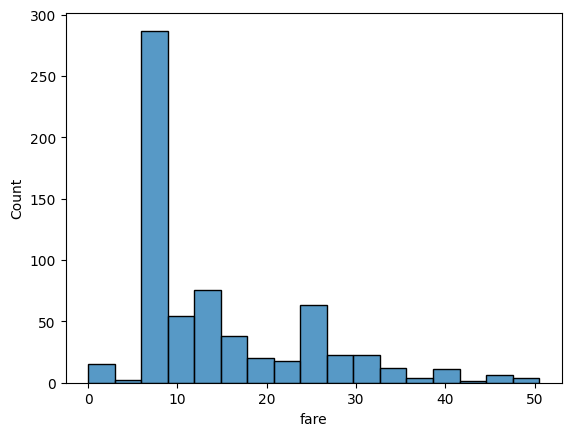

In [21]:
sns.histplot(df['fare'])

## Finding & droping duplicates

In [23]:
# finding duplicates
df.duplicated().sum()

101

In [24]:
# finding(where is duplicates present)
df_duplicated=df[df.duplicated()]
df_duplicated.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
47,1,3,female,28.946574,0,0,7.7500,Q,Third,woman,False,Queenstown,yes,True
76,0,3,male,28.946574,0,0,7.8958,S,Third,man,True,Southampton,no,True
77,0,3,male,28.946574,0,0,8.0500,S,Third,man,True,Southampton,no,True
87,0,3,male,28.946574,0,0,8.0500,S,Third,man,True,Southampton,no,True
95,0,3,male,28.946574,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [25]:
#droping duplicates
df.drop_duplicates(inplace=True)

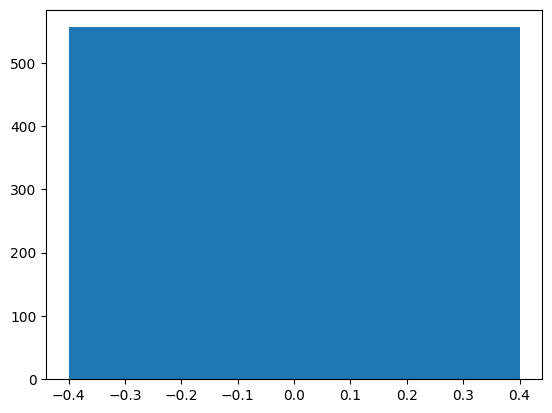

In [26]:
# Visualising
df_duplicates=df.duplicated()
df_duplicates_count=df_duplicates.value_counts()

plt.bar(df_duplicates_count.index, df_duplicates_count.values)
plt.show()

In [27]:
df.shape

(556, 14)

# Data Normalizatrion

To bring data at one scale

In [77]:
#1-Libraries import
#pip install scikit-learn
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

#2-data
df

#3-select column to normalize
cols_to_normalize= ['age','fare']

#4-Create the scaler function/tool
scaler= MinMaxScaler()

#5-fit and transform the data on scaler or vice versa
df[cols_to_normalize]= scaler.fit_transform(df[cols_to_normalize])

#6-Check the data
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,0.372549,1,0,0.118118,S,Third,man,True,Southampton,no,False
2,1,3,female,0.450980,0,0,0.129115,S,Third,woman,False,Southampton,yes,True
3,1,1,female,0.627451,1,0,0.865114,S,First,woman,False,Southampton,yes,False
4,0,3,male,0.627451,0,0,0.131152,S,Third,man,True,Southampton,no,True
5,0,3,male,0.523512,0,0,0.137804,Q,Third,man,True,Queenstown,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0.470588,0,0,0.211798,S,Second,man,True,Southampton,no,True
887,1,1,female,0.313725,0,0,0.488765,S,First,woman,False,Southampton,yes,True
888,0,3,female,0.523512,1,2,0.382051,S,Third,woman,False,Southampton,no,False
889,1,1,male,0.450980,0,0,0.488765,C,First,man,True,Cherbourg,yes,True


In [29]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000
mean,0.330935,2.552158,0.502592,0.413669,0.350719,0.311238
std,0.470974,0.678482,0.206831,0.870804,0.845347,0.202374
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.369565,0.000000,0.000000,0.155542
50%,0.000000,3.000000,0.520578,0.000000,0.000000,0.227742
75%,1.000000,3.000000,0.608696,1.000000,0.000000,0.478258
max,1.000000,3.000000,1.000000,5.000000,6.000000,1.000000


In [79]:
#Normalize by StandardScaler
#1-Libraries import
#pip install scikit-learn
import pandas as pd
from sklearn.preprocessing import StandardScaler

#2-data
df

#3-select column to normalize
cols_to_normalize= ['age','fare']

#4-Create the scaler function/tool
scaler= StandardScaler()

#5-fit and transform the data on scaler or vice versa
df[cols_to_normalize]= scaler.fit_transform(df[cols_to_normalize])

#6-Check the data
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,-0.644501,1,0,-0.751265,S,Third,man,True,Southampton,no,False
2,1,3,female,-0.245599,0,0,-0.700265,S,Third,woman,False,Southampton,yes,True
3,1,1,female,0.651930,1,0,2.712961,S,First,woman,False,Southampton,yes,False
4,0,3,male,0.651930,0,0,-0.690821,S,Third,man,True,Southampton,no,True
5,0,3,male,0.123297,0,0,-0.659971,Q,Third,man,True,Queenstown,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,-0.145874,0,0,-0.316820,S,Second,man,True,Southampton,no,True
887,1,1,female,-0.943677,0,0,0.967626,S,First,woman,False,Southampton,yes,True
888,0,3,female,0.123297,1,2,0.472736,S,Third,woman,False,Southampton,no,False
889,1,1,male,-0.245599,0,0,0.967626,C,First,man,True,Cherbourg,yes,True


In [31]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,556.000000,556.000000,5.560000e+02,556.000000,556.000000,5.560000e+02
mean,0.330935,2.552158,-4.600636e-16,0.413669,0.350719,1.405750e-16
std,0.470974,0.678482,1.000900e+00,0.870804,0.845347,1.000900e+00
min,0.000000,1.000000,-2.432152e+00,0.000000,0.000000,-1.539322e+00
25%,0.000000,2.000000,-6.437463e-01,0.000000,0.000000,-7.700430e-01
50%,0.000000,3.000000,8.703564e-02,0.000000,0.000000,-4.129554e-01
75%,1.000000,3.000000,5.134574e-01,1.000000,0.000000,8.260476e-01
max,1.000000,3.000000,2.407064e+00,5.000000,6.000000,3.406484e+00


### Equation of standard scaler
x_stand=(x-mean(x) / std(x))

where:\
x_stand: standard variable\
x: original variable\
mean(x): mean of variable x\
std(x): standard daviation of variable x

## Log Transformation

In log transformation, we have to `fill the null values` and `transform the log` at the same time.

In [106]:
kashti= sns.load_dataset('titanic')
kashti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [107]:
kashti.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [108]:
# log transformation
import numpy as np

kashti['age']=kashti['age'].fillna(kashti['age'].median())
kashti['fare']=kashti['fare'].fillna(kashti['fare'].median())

# Log transformation
kashti['age']=np.log(kashti['age'])
kashti['fare']=np.log(kashti['fare'])
kashti.head()


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,3.091042,1,0,1.981001,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,3.637586,1,0,4.266662,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,3.258097,0,0,2.070022,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,3.555348,1,0,3.972177,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,3.555348,0,0,2.085672,S,Third,man,True,NaN,Southampton,no,True


- agar kisi column me zero k qareeb ziada values hain to log transformation me `log1p` lain gy.

<Axes: xlabel='sex', ylabel='fare'>

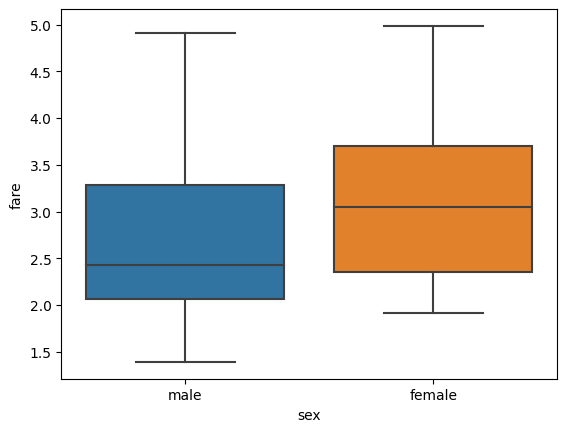

In [114]:
sns.boxplot(data=kashti, x='sex', y='fare')

<Axes: xlabel='age', ylabel='Count'>

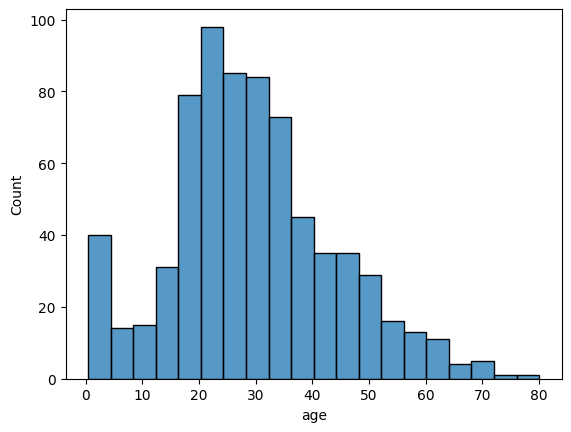

In [72]:
sns.histplot(kashti['age'])

<Axes: xlabel='age', ylabel='Count'>

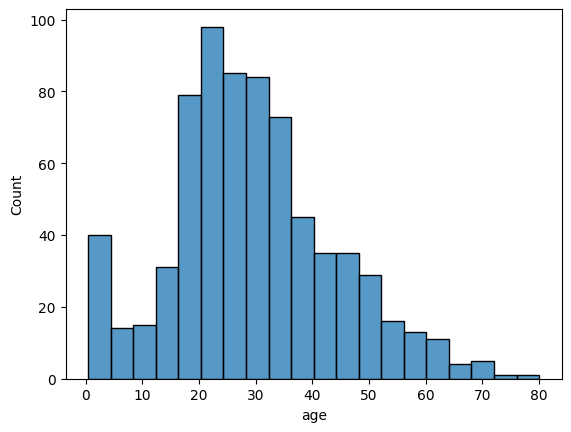

In [73]:
sns.histplot(kashti['age'])

In [43]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

## Organizing the data

we organize the data for better understanding he data

In [44]:
df['family_size']= df['sibsp'] + df['parch']

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 6.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='sex', ylabel='age'>

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 13.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


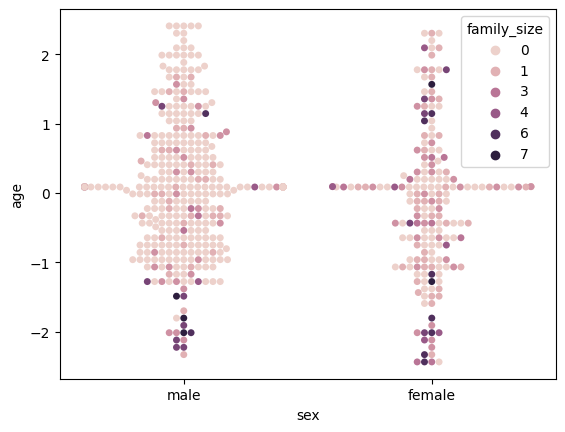

In [45]:
sns.swarmplot(data=df, x='sex', y='age', hue='family_size')

In [46]:
df=df.rename(columns={'survived':'survival'})
df.columns

Index(['survival', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone', 'family_size'],
      dtype='object')

In [47]:
# Pivot table
table=pd.pivot_table(df, values= 'fare', index='pclass',
                     columns='survival', aggfunc=np.sum)
table

survival,0,1
pclass,,
1,34.710122,43.848039
2,15.239513,29.480750
3,-85.340629,-37.937795


<Axes: xlabel='fare', ylabel='age'>

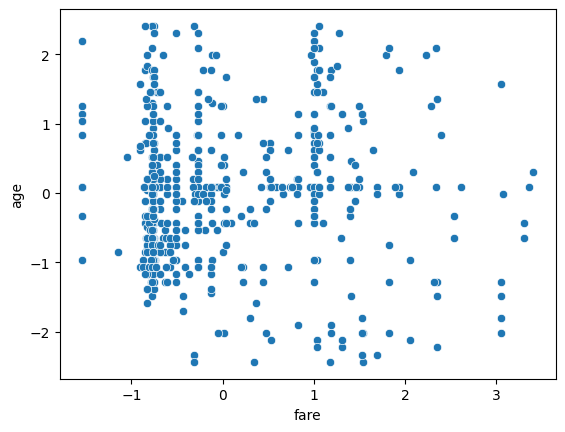

In [48]:
sns.scatterplot(data=df,x='fare', y='age')

In [49]:
df['family_size']= df['sibsp'] + df['parch']

In [50]:
df.head()

,survival,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,family_size
0,0,3,male,-0.643746,1,0,-0.829221,S,Third,man,True,Southampton,no,False,1
2,1,3,female,-0.222945,0,0,-0.763108,S,Third,woman,False,Southampton,yes,True,0
4,0,3,male,0.723858,0,0,-0.750865,S,Third,man,True,Southampton,no,True,0
5,0,3,male,0.087036,0,0,-0.710874,Q,Third,man,True,Queenstown,no,True,0
8,1,3,female,-0.117745,0,2,-0.448872,S,Third,woman,False,Southampton,yes,False,2


## Saving the wrangled data

In [237]:
df.to_csv("preprocessed_data.csv")

---
## June 20, 2023